In [1]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Constants
matplotlib.rcParams['figure.figsize'] = (16, 10)
dim = 2                  # number of dimensions of the points

In [3]:
def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    Input:
      A: Nxm numpy array of corresponding points
      B: Nxm numpy array of corresponding points
    Returns:
      T: (m+1)x(m+1) homogeneous transformation matrix that maps A on to B
      R: mxm rotation matrix
      t: mx1 translation vector
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
        print ("reverse!")
        Vt[m-1,:] *= -1
        R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t

In [4]:
# Generate a random dataset
random_mode = 'rand'

if random_mode == 'rand':
    # Constants
    N = 24                   # number of random points in the dataset
    noise_sigma = 0.1   # standard deviation error to be added
    translation = [2, 3]     # translation of the test set
    angle = 10                # rotation of the test set (degrees)
    width = 100
    A = np.random.rand(N, dim)*width - (width/2.)

elif random_mode == 'rand_real':
    # Constants
    N = 24                   # number of random points in the dataset
    noise_sigma = 0.0001   # standard deviation error to be added
    translation = [0.0002, 0.0003]     # translation of the test set
    angle = 0.004                # rotation of the test set (degrees)
    width = 3
    A = np.random.rand(N, dim)*width - (width/2.)

elif random_mode == 'gfa':
    # Constants
    noise_sigma = 0.1/3600   # standard deviation error to be added
    translation = [0.2/3600, 0.3/3600]     # translation of the test set
    angle = 0.004                # rotation of the test set (degrees)
    A=np.array([[-0.40835101, -1.55775898],
                [-0.38616096, -1.59640656],
                [-1.63599871, -0.08507781],
                [-1.65869892, -0.10561157],
                [-1.3867317 ,  0.898616  ],
                [-1.37333573,  0.86039132],
                [ 0.4128971 ,  1.64670138],
                [ 0.4072689 ,  1.56867414],
                [ 1.62429942,  0.1300505 ],
                [ 1.66880079,  0.12614881],
                [ 1.43087666, -0.9113398 ],
                [ 1.42426912, -0.88659406]])
    N=len(A)
A

array([[  3.43053726, -25.96817942],
       [-36.42102152,  11.69304675],
       [ -1.04716391, -31.95681087],
       [-24.96274377, -28.59999936],
       [-23.030987  , -48.24353098],
       [ 20.64617274,  -6.20876596],
       [ 41.9697129 ,   5.55910765],
       [-11.68620789,   7.993836  ],
       [ 49.79216355,  29.47668678],
       [-37.35730477,  36.67095027],
       [ 49.19306852, -33.27539953],
       [-29.29691436, -18.41248262],
       [-45.22981203, -16.14005563],
       [-14.0140428 ,  10.40431814],
       [-24.07752584,   4.97922681],
       [ 47.64066958,  49.27631496],
       [ 33.13560565,  15.78342208],
       [-29.20751547,  -5.44645315],
       [-15.33855698,  -1.67104929],
       [-31.35218124,  34.30806645],
       [ 36.85169095,  39.67926915],
       [-39.3307303 ,  23.50111169],
       [-33.46168134,   7.52353702],
       [-38.96929815,  32.2548958 ]])

In [5]:
B = np.copy(A)

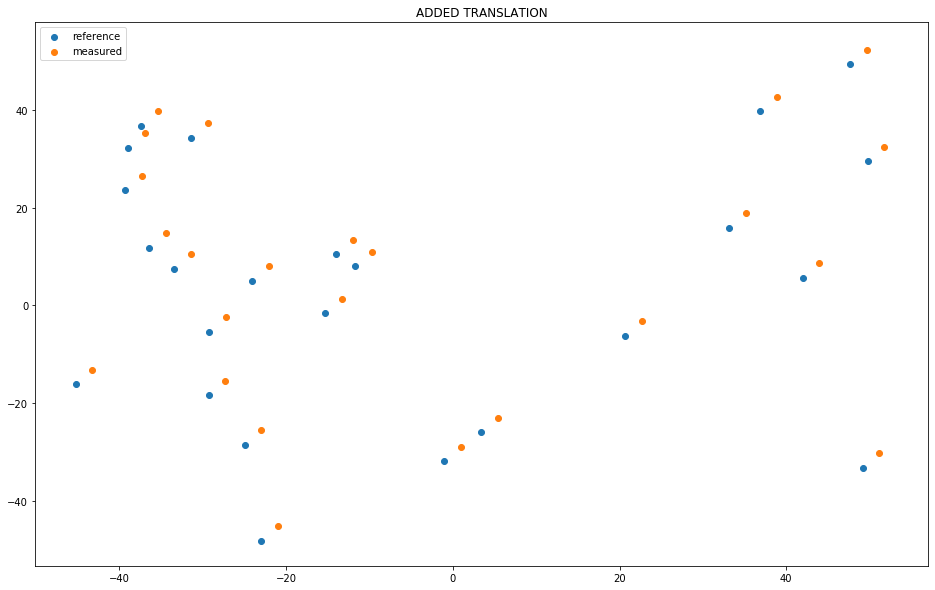

In [6]:
# Translate
t = translation
B += t
plt.title('ADDED TRANSLATION')
plt.scatter(A.T[0], A.T[1], label='reference')
plt.scatter(B.T[0], B.T[1], label='measured')
plt.legend()

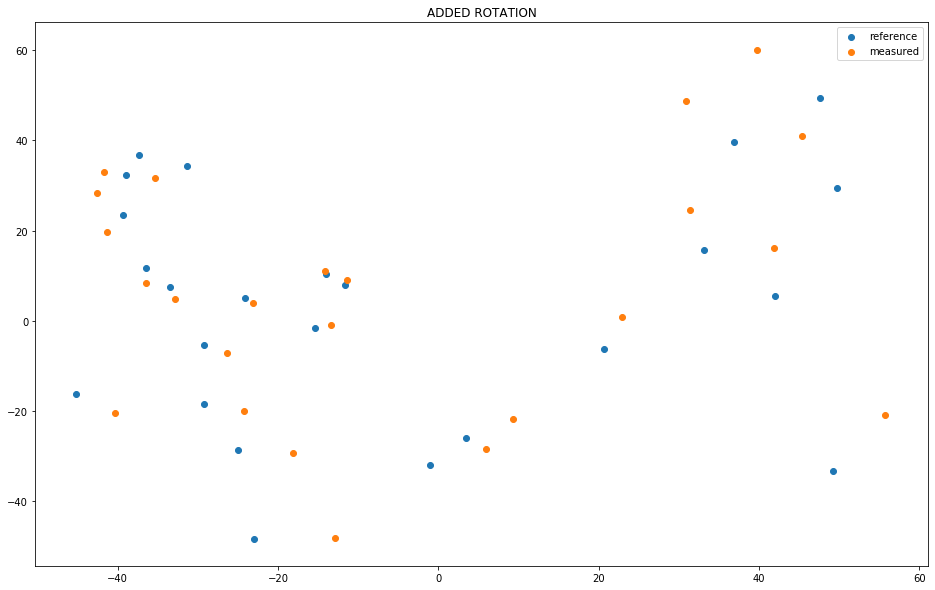

In [7]:
# Rotate

# center of rotation will affect the solution of translation
# Only when setting the center of rotation as the origin of coordinates
# will recover the original translation

at_origin = True

if at_origin:
    theta = (angle/180.) * np.pi
    R = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta),  np.cos(theta)]])
    B = np.dot(R, B.T).T

else:
    # Rotate at center of distribution
    centroid_B = np.mean(B, axis=0)
    B = B - centroid_B
    theta = (angle/180.) * np.pi
    R = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta),  np.cos(theta)]])
    B = np.dot(R, B.T).T
    B = B + centroid_B
    
plt.title('ADDED ROTATION')
plt.scatter(A.T[0], A.T[1], label='reference')
plt.scatter(B.T[0], B.T[1], label='measured')
plt.legend()

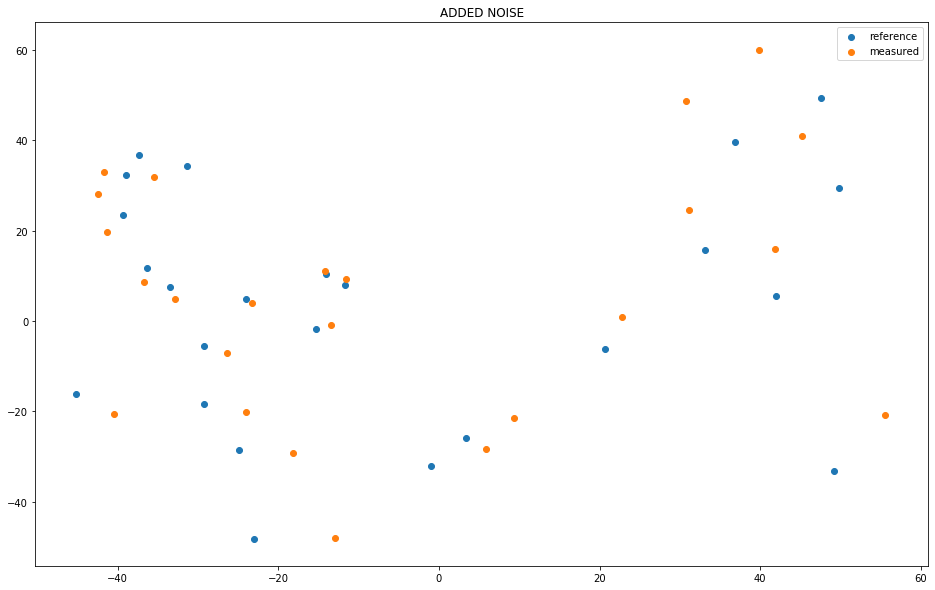

In [8]:
# Add noise
B += np.random.randn(N, dim) * noise_sigma
plt.title('ADDED NOISE')
plt.scatter(A.T[0], A.T[1], label='reference')
plt.scatter(B.T[0], B.T[1], label='measured')
plt.legend()

In [9]:
# COMPUTE SVD FIT
T, R1, t1 = best_fit_transform(B, A)

# Make C a homogeneous representation of B
C = np.ones((N, 3))
C[:,0:2] = B
# Transform C
C = np.dot(T, C.T).T

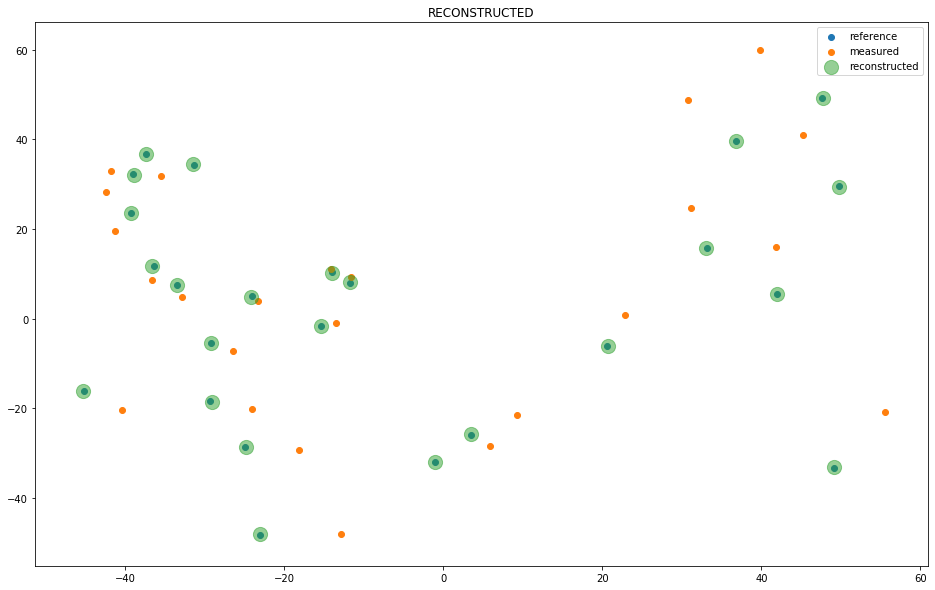

In [10]:
plt.title('RECONSTRUCTED')
plt.scatter(A.T[0], A.T[1], label='reference')
plt.scatter(B.T[0], B.T[1], label='measured')
plt.scatter(C.T[0], C.T[1], s=200, alpha=0.5, label='reconstructed')
plt.legend()

In [11]:
# MEASURED TRANSLATION
print("Measured translation: %s" % -t1)
print("Translation error: %s" % (translation+t1))

Measured translation: [1.94151884 2.99697454]
Translation error: [0.05848116 0.00302546]


In [12]:
# MEASURED ROTATION
measured_rot = np.arcsin(R1[0][1])*180./np.pi
print("Measured rotation: %s" % measured_rot)
print("Rotation error: %s" % (measured_rot-angle))

Measured rotation: 10.003752268336942
Rotation error: 0.0037522683369424215
